In [ ]:
!unzip '/content/165899276823660ec2379f8793842aa5b168a_ (1).zip'

unzip:  cannot find or open /content/165899276823660ec2379f8793842aa5b168a_ (1).zip, /content/165899276823660ec2379f8793842aa5b168a_ (1).zip.zip or /content/165899276823660ec2379f8793842aa5b168a_ (1).zip.ZIP.




1.   Load the data and libraries
2.   EDA
3.   Data Preparation
4.   Time Series Decomposition
     1. Trend
     2. Seasonality
     3. Irregular Component
5.   Check for Stationarity (Augmented Dickey Fuller Test)
6.   Moving Average
7.   Exponential Smoothing: Holt & Winters
8.   ARMA, ARIMA & Prophet




Import the libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose


Import the data

In [ ]:
data = pd.read_csv('/content/Super_Store.csv',encoding = 'cp1252')

In [ ]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [ ]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
cols_select = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Quantity', 'Discount', 'Profit']

In [ ]:
data_sales = data.drop(cols_select, axis = 1)

In [ ]:
data_sales.head()

,Order Date,Sales
0,11/8/2016,261.9600
1,11/8/2016,731.9400
2,10/11/2015,957.5775
3,6/9/2014,48.8600
4,6/9/2014,1706.1840


In [ ]:
data_sales = data_sales.sort_values('Order Date')

In [ ]:
data_sales.head()

,Order Date,Sales
845,1/1/2017,474.430
1707,1/1/2017,141.420
1708,1/1/2017,310.744
179,1/1/2017,48.896
181,1/10/2014,51.940


In [ ]:
data_sales["Order Date"] = pd.to_datetime(data_sales["Order Date"])

In [ ]:
print(data_sales['Order Date'].min())
print(data_sales['Order Date'].max())

2014-01-06 00:00:00
2017-12-30 00:00:00


In [ ]:
data_sales["Order Date"] = pd.to_datetime(data_sales["Order Date"])
data_sales = data_sales.set_index('Order Date')

In [ ]:
data_sales

,Sales
Order Date,
2017-01-01,474.430
2017-01-01,141.420
2017-01-01,310.744
2017-01-01,48.896
2014-01-10,51.940
...,...
2017-09-09,66.112
2017-09-09,243.920
2017-09-09,17.024


In [ ]:
data_sales = data_sales.resample('D').sum()
data_sales

,Sales
Order Date,
2014-01-06,2573.8200
2014-01-07,76.7280
2014-01-08,0.0000
2014-01-09,0.0000
2014-01-10,51.9400
...,...
2017-12-26,0.0000
2017-12-27,0.0000
2017-12-28,551.2568


In [ ]:
data_sales.head()

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-08,0.000
2014-01-09,0.000
2014-01-10,51.940


In [ ]:
data_sales = data_sales.resample('MS').mean()
data_sales

,Sales
Order Date,
2014-01-01,240.097115
2014-02-01,65.702071
2014-03-01,470.127613
2014-04-01,264.827900
2014-05-01,222.993129
2014-06-01,440.204187
2014-07-01,349.066161
2014-08-01,236.140210
2014-09-01,793.882693


In [ ]:
data_sales.describe()

,Sales
count,48.000000
mean,508.399658
std,300.303278
min,65.702071
25%,302.362969
50%,408.078629
75%,709.160535
max,1235.223833


<Axes: xlabel='Order Date'>

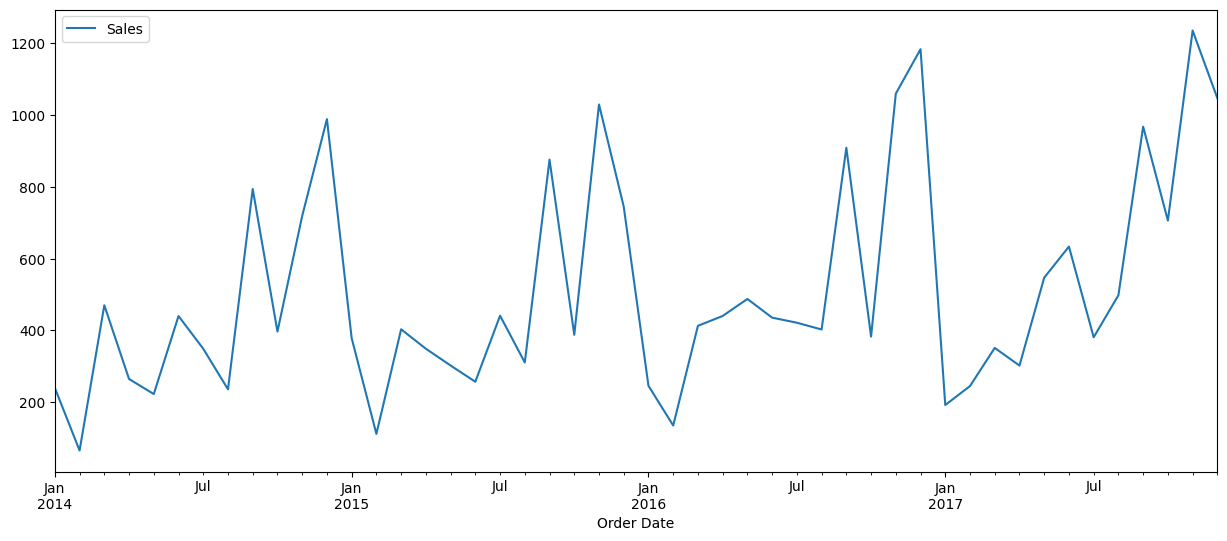

In [ ]:
data_sales.plot(figsize = (15,6))

seasonal decompose

In [ ]:
series = data_sales
result = seasonal_decompose(series,model = 'additive')
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)

Order Date
2014-01-01           NaN
2014-02-01           NaN
2014-03-01           NaN
2014-04-01           NaN
2014-05-01           NaN
2014-06-01           NaN
2014-07-01    438.055522
2014-08-01    445.757628
2014-09-01    444.896422
2014-10-01    445.623640
2014-11-01    452.448085
2014-12-01    448.129741
2015-01-01    444.337211
2015-02-01    451.288306
2015-03-01    457.816092
2015-04-01    460.854806
2015-05-01    473.420489
2015-06-01    476.197834
2015-07-01    460.502476
2015-08-01    455.944520
2015-09-01    457.325418
2015-10-01    461.530946
2015-11-01    473.053109
2015-12-01    488.214163
2016-01-01    494.839215
2016-02-01    497.848272
2016-03-01    503.046516
2016-04-01    504.214267
2016-05-01    505.261099
2016-06-01    524.785004
2016-07-01    540.825575
2016-08-01    543.173729
2016-09-01    545.187292
2016-10-01    536.864733
2016-11-01    533.576275
2016-12-01    544.293576
2017-01-01    550.853322
2017-02-01    553.142495
2017-03-01    559.571005
2017-04-01    

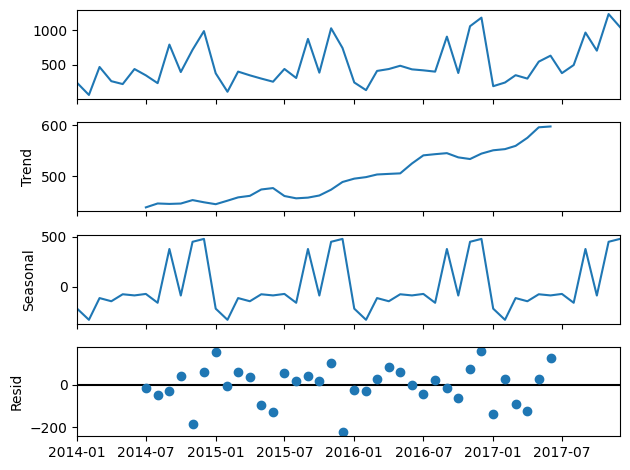

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
series = data_sales
result = seasonal_decompose(series, model='additive')
result.plot()
pyplot.show()

Augmented Dickey Fuller Test

Null Hypothesis: Data is non stationary
Alternate Hypothesis: Data is stationary

In [ ]:
adf_test = adfuller(data_sales)

In [ ]:
print("ADF Statistic: %f" % adf_test[0]) #%f means float
print('P-value: %f' % adf_test[1])

ADF Statistic: -4.727837
P-value: 0.000075


auto correlation plot

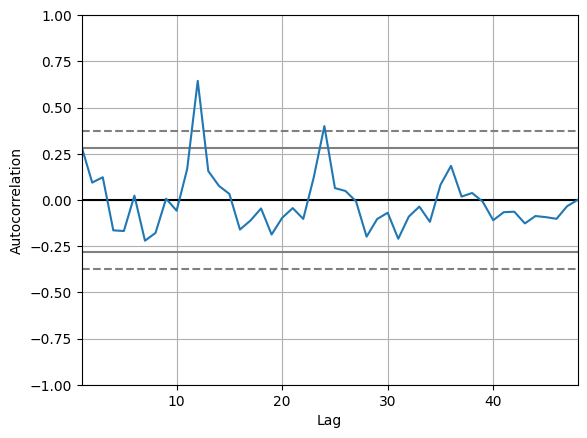

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data_sales)
plt.show()

<Axes: xlabel='Order Date'>

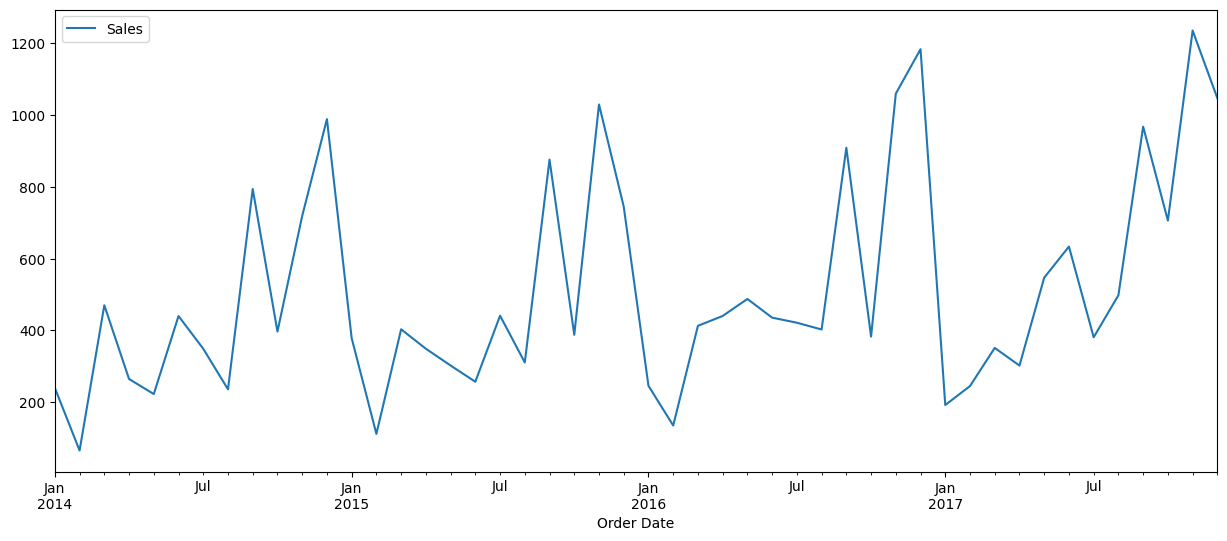

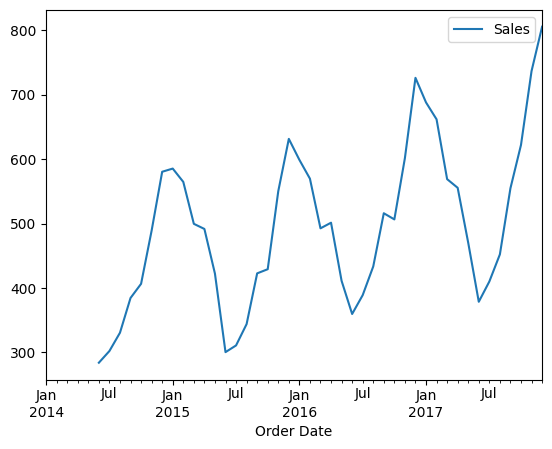

In [ ]:
# Moving Average
data_sales_MA = data_sales.rolling(window = 6).mean()
data_sales.plot(figsize = (15,6))
data_sales_MA.plot()

2018-01-01    812.432167
Freq: MS, dtype: float64


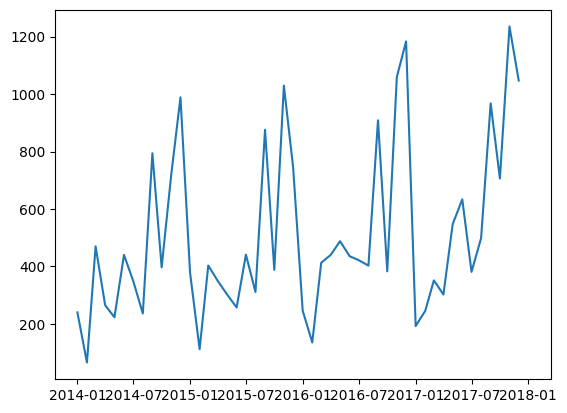

In [ ]:
# Exponential Smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
# Simple Exponential Smoothing
# fit model
model = SimpleExpSmoothing(data_sales)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data_sales), len(data_sales))
print(yhat)
# plot
plt.plot(data_sales)
plt.plot(yhat, color='red')
plt.show()

2018-01-01    440.764523
Freq: MS, dtype: float64


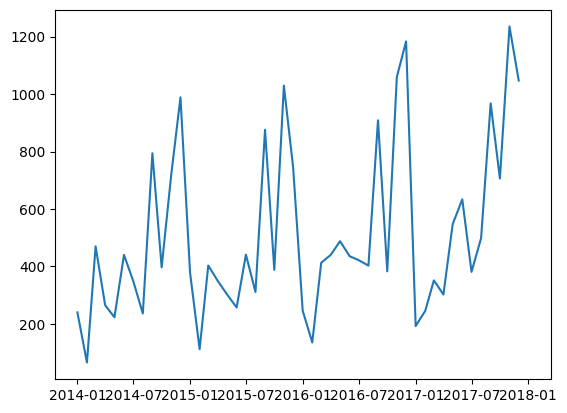

In [ ]:
# Holt Winter's Exponential Smoothing
# fit model
model = ExponentialSmoothing(data_sales, trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data_sales), len(data_sales))
print(yhat)
# plot
plt.plot(data_sales)
plt.plot(yhat, color='red')
plt.show()

In [ ]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(data_sales,order=(3, 1, 3))
results=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
forecast =results.predict(start='2014-01-01',end='2018-12-01')

In [ ]:
forecast

2014-01-01      0.000000
2014-02-01    228.141913
2014-03-01    122.046315
2014-04-01    332.392573
2014-05-01    209.745405
2014-06-01    335.420851
2014-07-01    291.744794
2014-08-01    272.514228
2014-09-01    375.001237
2014-10-01    464.703413
2014-11-01    331.857098
2014-12-01    701.491252
2015-01-01    568.073500
2015-02-01    442.149941
2015-03-01    446.923215
2015-04-01    221.243780
2015-05-01    378.489540
2015-06-01    529.141148
2015-07-01    157.939085
2015-08-01    403.263814
2015-09-01    502.188244
2015-10-01    487.895471
2015-11-01    409.263916
2015-12-01    898.350160
2016-01-01    460.379261
2016-02-01    431.991160
2016-03-01    416.073208
2016-04-01    241.324112
2016-05-01    496.998084
2016-06-01    589.852397
2016-07-01    273.899064
2016-08-01    487.472603
2016-09-01    530.241356
2016-10-01    517.959769
2016-11-01    503.916108
2016-12-01    884.515064
2017-01-01    694.907463
2017-02-01    516.569355
2017-03-01    466.833819
2017-04-01    206.997642


In [ ]:
data_sales

,Sales
Order Date,
2014-01-01,240.097115
2014-02-01,65.702071
2014-03-01,470.127613
2014-04-01,264.827900
2014-05-01,222.993129
2014-06-01,440.204187
2014-07-01,349.066161
2014-08-01,236.140210
2014-09-01,793.882693
